# EDA

Загружаем датасет и библиотеки, которые в дальнейшем потребуюся

In [504]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

Сразу изменим название некоторых колонок для удобства

In [505]:
stud = stud.rename({'Medu': 'medu', 'Fedu': 'fedu',
                    'Mjob': 'mjob', 'Fjob': 'fjob',
                    'studytime, granular': 'granular',
                    'Pstatus': 'pstatus'}, axis=1)

In [358]:
display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   pstatus     350 non-null    object 
 6   medu        392 non-null    float64
 7   fedu        371 non-null    float64
 8   mjob        376 non-null    object 
 9   fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

Проверяем, что данные корректно загрузились. Количество строк 395, столбцов - 30. Из них числовых объектов 13, строковых - 17.

Функции, которые использовались в дальнейшем анализе:

In [335]:
def isna_col(col):
    print(col, stud[col].isna().sum())  # возвращает количество пустых значений

In [336]:
def replace_na(col):
    stud[col] = stud[col].fillna(round(stud[col].median(),0)) 
    # заменяет отсутствующее значение на медианное в данной колонке

In [346]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'],
                     stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки: ', column)
            break
# ищет статистически значимые колонки в датасете

In [338]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=stud.loc[stud.loc[:, column].isin(
                    stud.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show() # строит боксплоты, сравнивая с параметром 'score'

Данные, которые содержит датасет:   
1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

Разберёмся с каждым столбцом по отдельности.
# school

In [8]:
pd.DataFrame(stud.school.value_counts())

,school
GP,349
MS,46


# sex

In [9]:
pd.DataFrame(stud.sex.value_counts())

,sex
F,208
M,187


# age

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

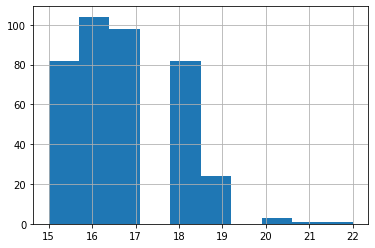

In [13]:
stud.age.hist()
stud.age.describe()

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


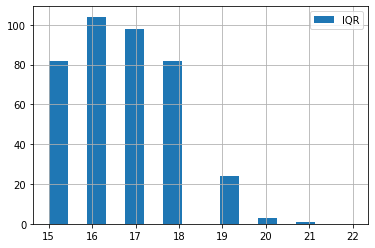

In [16]:
IQR = stud.age.quantile(0.75) - stud.age.quantile(0.25)
perc25 = stud.age.quantile(0.25)
perc75 = stud.age.quantile(0.75)

print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

stud.age.loc[stud.age.between(
    perc25 - 1.5*IQR,
    perc75 + 1.5*IQR)].hist(bins=16, range=(15, 22), label='IQR')


plt.legend()

Я бы убрала данные по учащимся, старше двадцати, но суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике. Поэтому мы должны также учитывать данные по ученикам старшего возраста и убрать их, только если в дальнейшем они плохо повлияют на предсказательную модель.

# address

In [30]:
pd.DataFrame(stud.address.value_counts())

,address
U,295
R,83


# famsize 

In [31]:
pd.DataFrame(stud.famsize.value_counts())

,famsize
GT3,261
LE3,107


# pstatus

In [35]:
pd.DataFrame(stud.pstatus.value_counts())

,pstatus
T,314
A,36


# Medu

In [36]:
pd.DataFrame(stud.medu.value_counts())

,medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

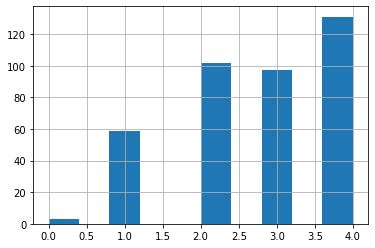

In [37]:
stud.medu.hist()
stud.medu.describe()

# Fedu

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: fedu, dtype: float64

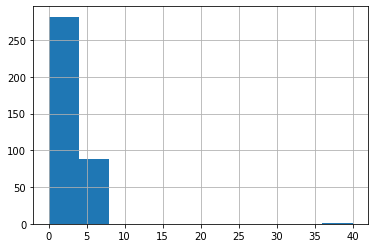

In [38]:
stud.fedu.hist()
stud.fedu.describe()

In [368]:
stud = stud.loc[stud.fedu <= 4]

# Mjob

In [135]:
pd.DataFrame(stud.mjob.value_counts())

,mjob
other,133
services,98
at_home,58
teacher,55
health,32


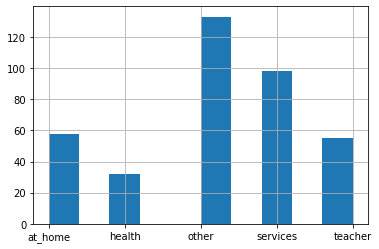

In [136]:
stud.mjob.hist()

# Fjob

In [40]:
pd.DataFrame(stud.fjob.value_counts())

,fjob
other,197
services,102
teacher,29
at_home,16
health,15


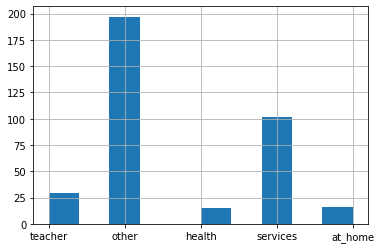

In [137]:
stud.fjob.hist()

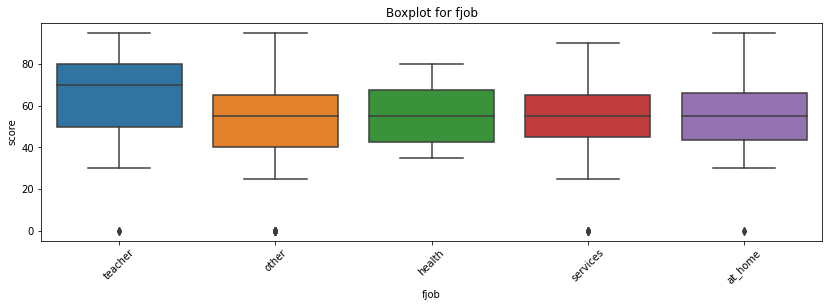

In [459]:
get_boxplot('fjob')

Из данного графика видно, что все признаки, кроме teacher, не имеют особых различий. Поэтому я немного переделаю столбец, сделав признаки teacher и teacher и other.

In [462]:
stud.fjob = stud.fjob.apply(lambda x: 'teacher' if x=='teacher' else 'other')

# reason

In [41]:
pd.DataFrame(stud.reason.value_counts())

,reason
course,137
home,104
reputation,103
other,34


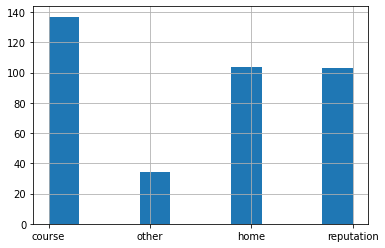

In [138]:
stud.reason.hist()

# guardian

In [62]:
pd.DataFrame(stud.guardian.value_counts())

,guardian
mother,250
father,86
other,28


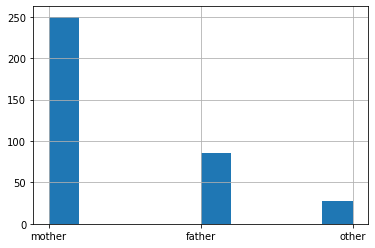

In [139]:
stud.guardian.hist()

# traveltime

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

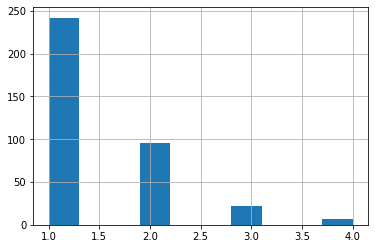

In [43]:
stud.traveltime.hist()
stud.traveltime.describe()

# studytime

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

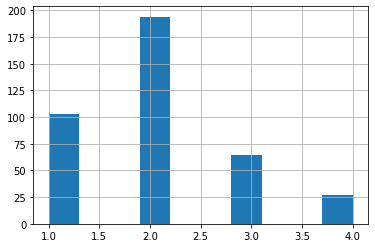

In [154]:
stud.studytime.hist()
stud.studytime.describe()

# failures

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

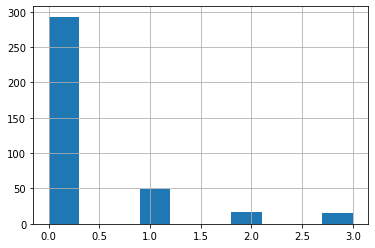

In [109]:
stud.failures .hist()
stud.failures .describe()

# schoolsup

In [112]:
pd.DataFrame(stud.schoolsup.value_counts())

,schoolsup
no,335
yes,51


# famsup

In [113]:
pd.DataFrame(stud.famsup.value_counts())

,famsup
yes,219
no,137


# paid

In [114]:
pd.DataFrame(stud.paid.value_counts())

,paid
no,200
yes,155


# activities

In [140]:
pd.DataFrame(stud.activities.value_counts())

,activities
yes,195
no,186


# nursery

In [119]:
pd.DataFrame(stud.nursery .value_counts())

,nursery
yes,300
no,79


# higher

In [120]:
pd.DataFrame(stud.higher .value_counts())

,higher
yes,356
no,19


# internet

In [123]:
pd.DataFrame(stud.internet.value_counts())

,internet
yes,305
no,56


# romantic

In [124]:
pd.DataFrame(stud.romantic.value_counts())

,romantic
no,240
yes,124


# famrel

count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

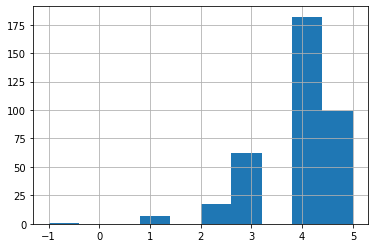

In [133]:
stud.famrel.hist()
stud.famrel.describe()

В описании данного столбца используются значения от от 1  до 5. Значит, меньше нуля - выбросы. Удаляем их

In [165]:
stud = stud.loc[stud.famrel >= 1]

count    367.000000
mean       3.950954
std        0.891853
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

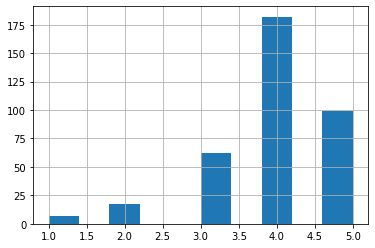

In [142]:
stud.famrel.hist()
stud.famrel.describe()

# freetime

count    357.000000
mean       3.238095
std        0.998260
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

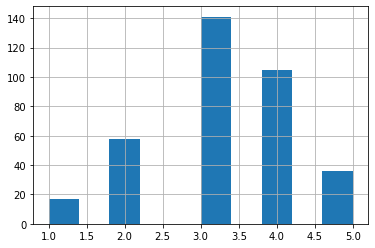

In [136]:
stud.freetime .hist()
stud.freetime .describe()

# goout

count    359.000000
mean       3.108635
std        1.107066
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

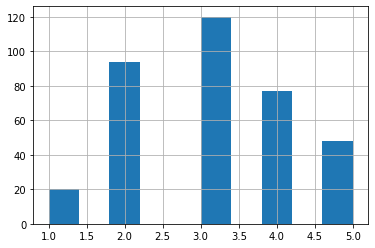

In [137]:
stud.goout.hist()
stud.goout.describe()

# health

count    352.000000
mean       3.488636
std        1.381558
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

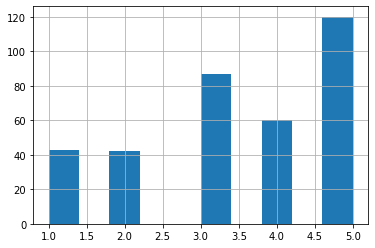

In [138]:
stud.health .hist()
stud.health .describe()

# absences

count    355.000000
mean       7.242254
std       24.040759
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

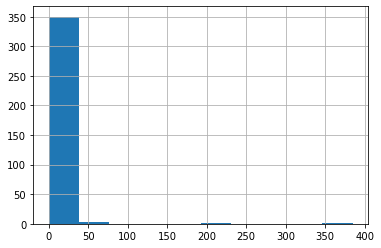

In [139]:
stud.absences.hist()
stud.absences.describe()

Text(0, 0.5, 'absences')

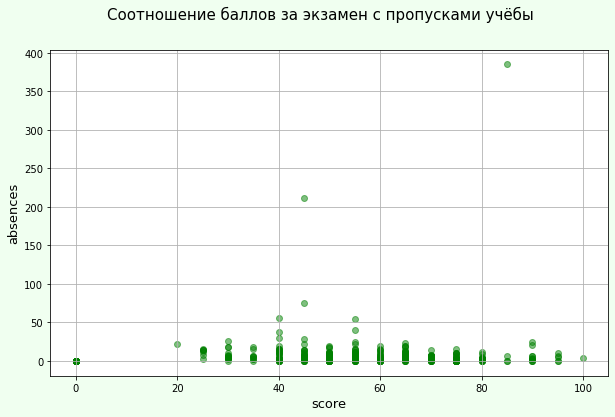

In [428]:
figsize = (10,6)

fig = plt.figure(figsize=figsize, facecolor='honeydew', frameon=True)
plt.scatter(stud.score, stud.absences, alpha=0.5, color = 'green')
plt.grid(True)
plt.suptitle('Соотношение баллов за экзамен с пропусками учёбы', fontsize=15)
plt.xlabel('score', fontsize=13)
plt.ylabel('absences', fontsize=13)

В данном столбце явно присутствуют выбросы, уточним их границы и удалим из датасета

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


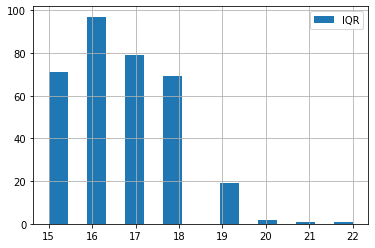

In [156]:
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)

print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

stud.age.loc[stud.absences.between(
    perc25 - 1.5*IQR,
    perc75 + 1.5*IQR)].hist(bins=16, range=(15, 22), label='IQR')

plt.legend()

In [331]:
stud = stud.loc[stud.absences <= 20]

count    339.000000
mean       4.551622
std        4.848548
min        0.000000
25%        0.000000
50%        4.000000
75%        7.000000
max       20.000000
Name: absences, dtype: float64

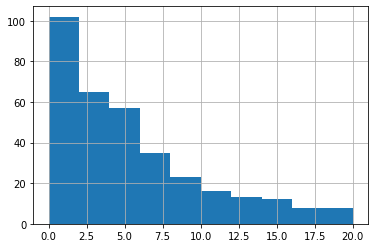

In [142]:
stud.absences.hist()
stud.absences.describe()

# score

count    283.000000
mean      57.650177
std       15.524217
min       25.000000
25%       50.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

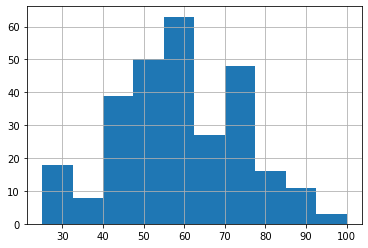

In [442]:
stud.score .hist()
stud.score .describe()

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


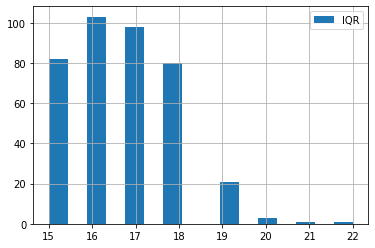

In [177]:
IQR = stud.score.quantile(0.75) - stud.score.quantile(0.25)
perc25 = stud.score.quantile(0.25)
perc75 = stud.score.quantile(0.75)

print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

stud.age.loc[stud.score.between(
    perc25 - 1.5*IQR,
    perc75 + 1.5*IQR)].hist(bins=16, range=(15, 22), label='IQR')

plt.legend()

Уберём строки, в которых не указаны баллы по экзамену - для нас они бесполезны.

In [397]:
stud = stud.loc[stud.score.isna() == False]

In [448]:
stud[stud.score == 0]

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
128,GP,M,18,R,NaN,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
130,GP,F,15,R,GT3,T,3.0,4.0,services,teacher,course,father,2.0,3.0,2.0,no,yes,no,no,yes,-9.0,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,0.0
131,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
134,GP,M,15,R,GT3,T,3.0,4.0,at_home,teacher,course,mother,NaN,2.0,0.0,no,yes,no,no,yes,-6.0,yes,no,yes,5.0,3.0,3.0,5.0,0.0,0.0
135,GP,F,15,U,GT3,T,4.0,4.0,services,NaN,course,mother,1.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,yes,4.0,3.0,3.0,5.0,0.0,0.0
136,GP,M,17,R,GT3,T,3.0,4.0,at_home,other,course,mother,3.0,2.0,0.0,no,no,NaN,no,yes,-6.0,yes,no,no,NaN,4.0,5.0,5.0,0.0,0.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,NaN,father,2.0,4.0,0.0,yes,yes,no,NaN,yes,-12.0,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,NaN,1.0,1.0,3.0,no,yes,no,no,yes,-3.0,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0
146,GP,F,15,U,GT3,T,3.0,2.0,health,services,home,father,1.0,2.0,3.0,no,NaN,no,no,yes,-6.0,yes,yes,no,3.0,3.0,2.0,3.0,0.0,0.0


Также мы имеем 37 человек, у которых 0 баллов за итоговый тест. 9,37%, что довольно много. Является ли ноль баллов оценкой за неявку на экзамен или они действительно набрали столько - не указано, но довольно сложно представить, чтобы столько учеников совсем не набрали баллов. 
Что примечательно, почти у всех из них не было подержки школы и пропущенных занятий, большинство хотели получить высшее образование, жили недалеко от школы и имели интернет. Также они преимущественно из школы GP, живут в городе, и их родители проживают вместе. Больших проблем у них не наблюдается, поэтому совершенно не понятно, почему их оценкой является ноль.  
Мне кажется, что если бы с ними что-то случилось (перевод в другую школу, болезнь, смерть и тд) - это были бы пропущенные значения, которые мы уже отфильтровали.
Хотя возможно, что отсутствие на экзамене без уважительной причины является веским основанием считать, что учащийся набрал 0 быллов. Нужно ли в таком случае учитывать их в выборке, чтобы можно было предсказать, у каких учеников могут получиться такие оценки?  
Следуюшей после нуля оценкой является 22. Не 2, 5 или 10, а 22, что, вероятнее всего, говорит о том, что студенты отсутствовали на экзамене, потому что те, кто пришёл, были в состоянии правильно решить хотя бы 20%.
И хотя почти 10% - это большая часть выборки, без них расределение становится более нормальным, поэтому мы убираем эти значения так же, как и отсутсвующие.

In [449]:
stud = stud.loc[stud.score != 0]

count    113.000000
mean      54.911504
std       15.895618
min       25.000000
25%       45.000000
50%       55.000000
75%       65.000000
max       95.000000
Name: score, dtype: float64

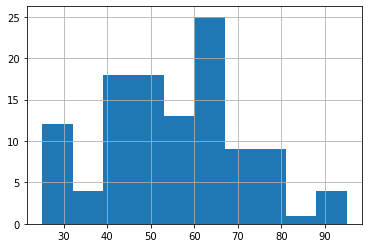

In [146]:
stud.score.hist()
stud.score.describe()

# granular

count    113.000000
mean      -6.106195
std        2.716888
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: granular, dtype: float64

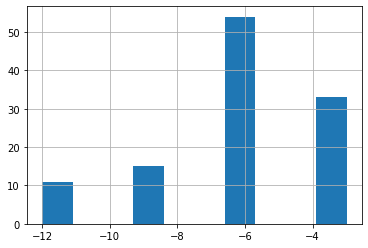

In [159]:
stud.granular.hist()
stud.granular.describe()

# Statistics

In [503]:
stud.corr()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.143506,-0.159204,0.088006,-0.011535,0.247817,0.054259,0.004195,0.094280,-0.042061,0.189900,-0.140389
medu,-0.143506,1.000000,0.628453,-0.160112,0.089083,-0.204360,-0.014647,0.005187,0.065239,-0.080107,0.079877,0.183701
fedu,-0.159204,0.628453,1.000000,-0.170849,-0.011969,-0.288362,-0.021132,-0.015884,0.016066,-0.010214,-0.025963,0.136031
traveltime,0.088006,-0.160112,-0.170849,1.000000,-0.101265,0.090876,-0.054376,0.020663,0.012899,0.000013,-0.053643,-0.083105
studytime,-0.011535,0.089083,-0.011969,-0.101265,1.000000,-0.137278,0.034175,-0.137766,-0.033904,-0.113132,-0.081827,0.158734
failures,0.247817,-0.204360,-0.288362,0.090876,-0.137278,1.000000,0.026127,0.130253,0.089783,0.067362,0.139991,-0.257057
famrel,0.054259,-0.014647,-0.021132,-0.054376,0.034175,0.026127,1.000000,0.148128,0.050017,0.121349,-0.078890,0.048474
freetime,0.004195,0.005187,-0.015884,0.020663,-0.137766,0.130253,0.148128,1.000000,0.266382,0.089264,0.093242,0.010222
goout,0.094280,0.065239,0.016066,0.012899,-0.033904,0.089783,0.050017,0.266382,1.000000,0.015302,0.082920,-0.158203
health,-0.042061,-0.080107,-0.010214,0.000013,-0.113132,0.067362,0.121349,0.089264,0.015302,1.000000,0.003184,-0.055140


Из матрицы корреляций видно, что столбцы 'studytime' и 'studytime, granular', который в моём случае назван просто 'granular', максимально коррелируют друг с другом, поэтому один из этих столбцов можно исключить.

In [354]:
stud.drop(['granular'], inplace=True, axis=1)

Разберёмся с отсутсвующими значениями

In [481]:
for col in ['age', 'absences']:
    isna_col(col)

age 0
absences 0


Заменим все отсутсвующие значения на медианное по столбцу только у числовых колонок.

In [482]:
for col in ['medu', 'fedu', 'traveltime', 'studytime', 'failures', 'famrel',
            'freetime', 'goout', 'health']:
    replace_na(col)

In [483]:
for col in ['medu', 'fedu', 'traveltime', 'studytime', 'failures', 'famrel',
            'freetime', 'goout', 'health']:
    isna_col(col)

medu 0
fedu 0
traveltime 0
studytime 0
failures 0
famrel 0
freetime 0
goout 0
health 0


Все вносимые изменения в общий датасет:

In [506]:
stud = stud.loc[stud.score.isna() == False]
stud = stud.loc[stud.famrel >= 1]
stud.drop(['granular'], inplace=True, axis=1)
stud = stud.loc[stud.fedu <= 4]

In [508]:
stud = stud.loc[stud.absences <= 20]

In [510]:
stud = stud.loc[stud.score != 0]

In [485]:
stud.fjob = stud.fjob.apply(lambda x: 'teacher' if x=='teacher' else 'other')

Для наглядности построим боксплоты, демонстрирующие влияние на успеваемость всех параметров в датасете

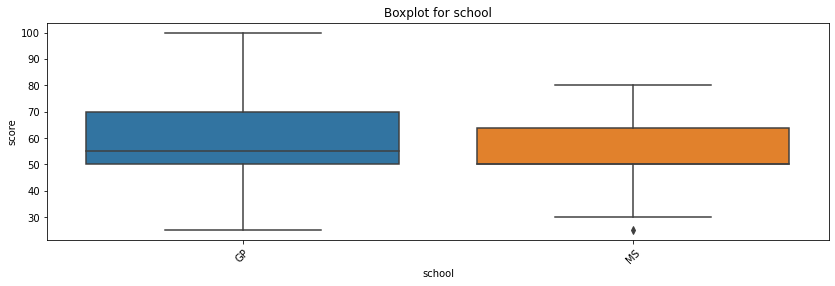

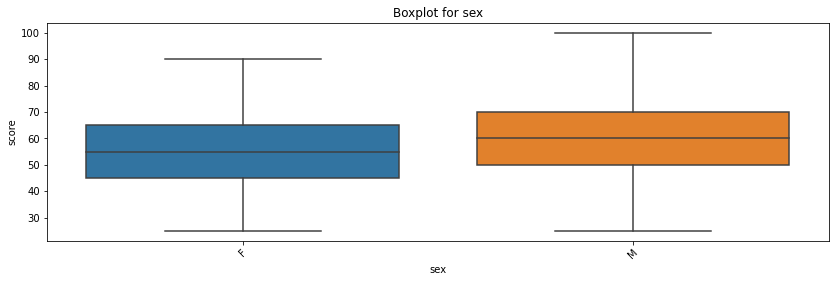

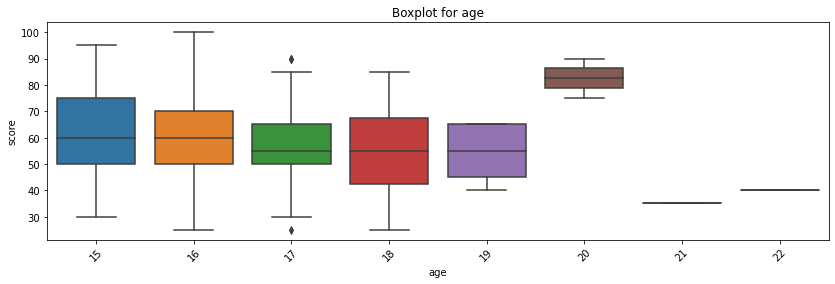

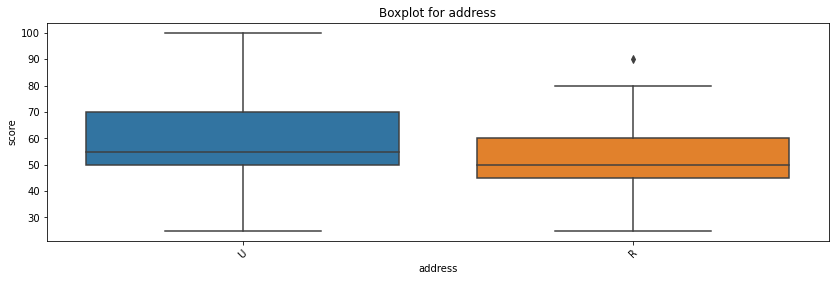

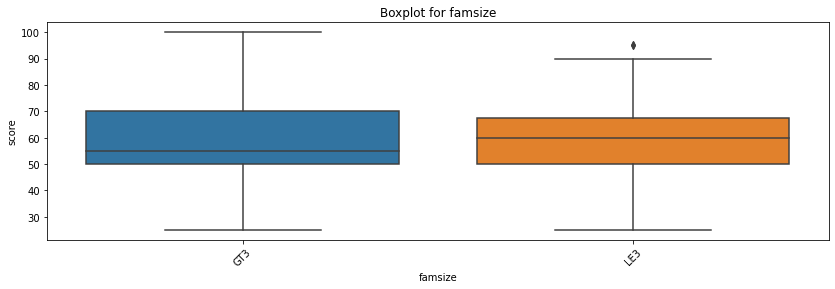

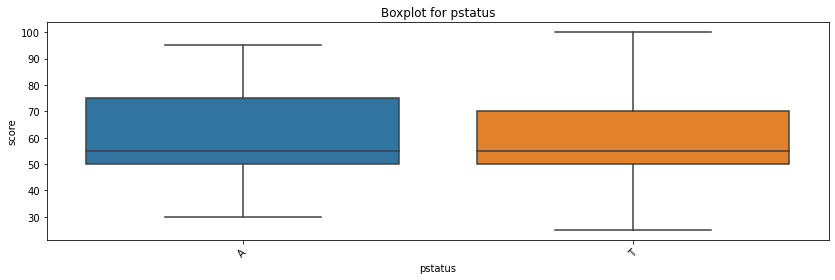

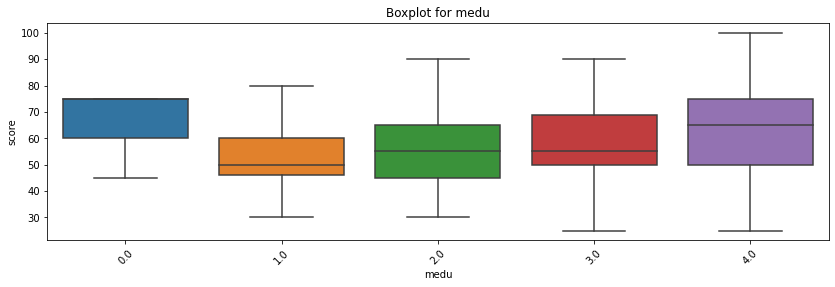

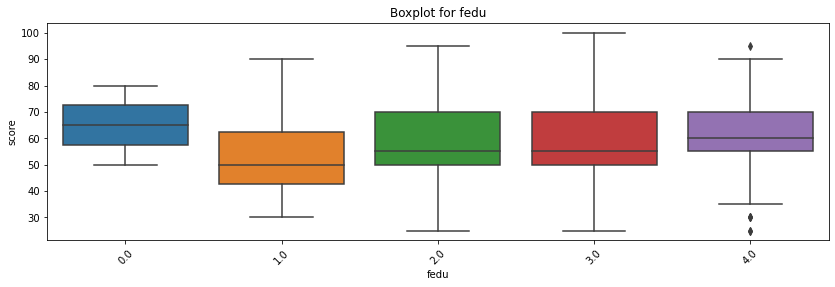

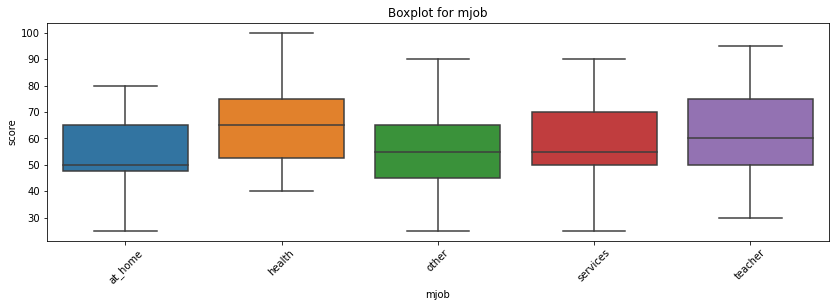

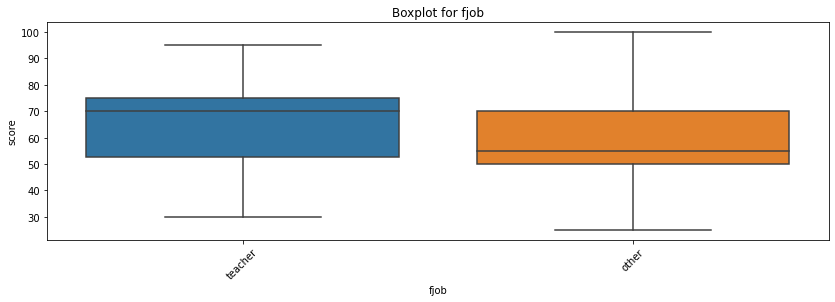

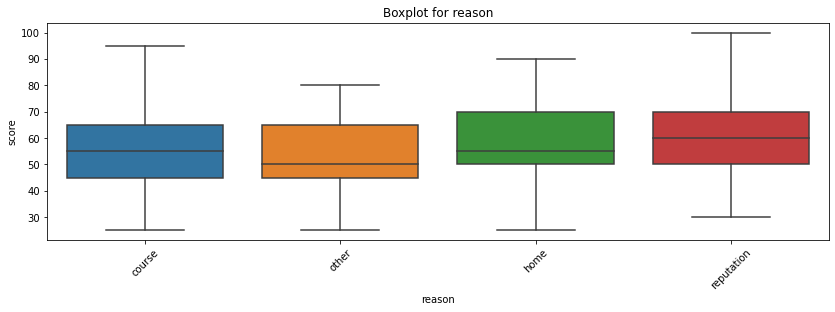

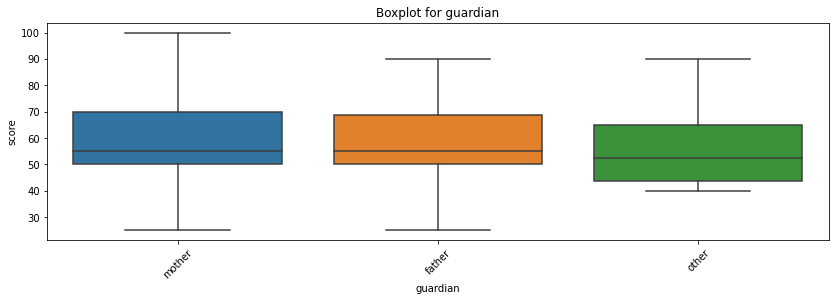

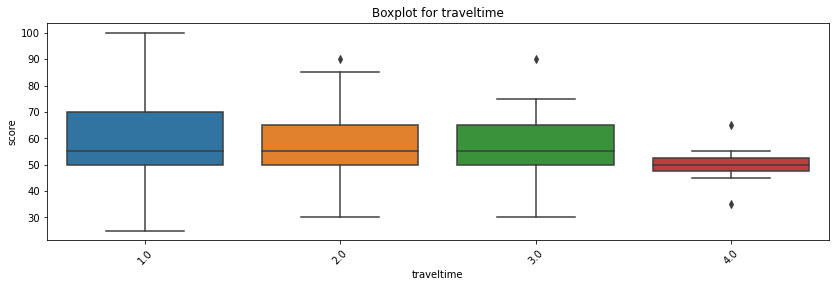

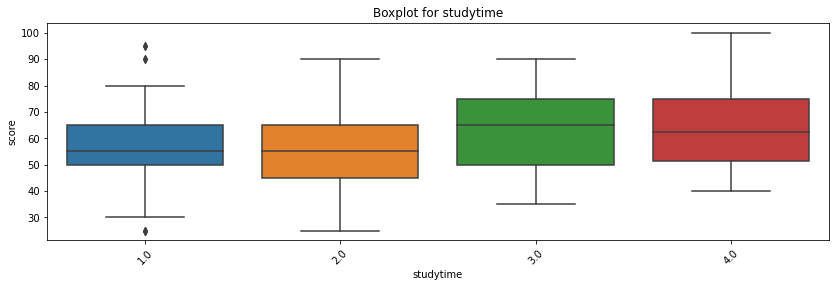

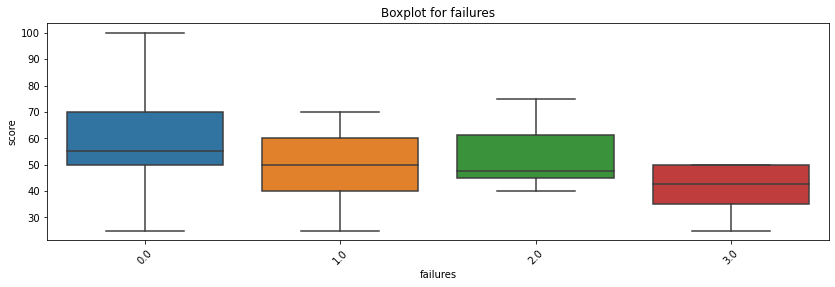

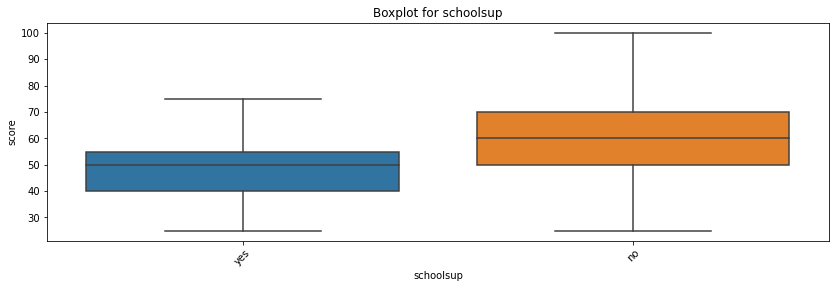

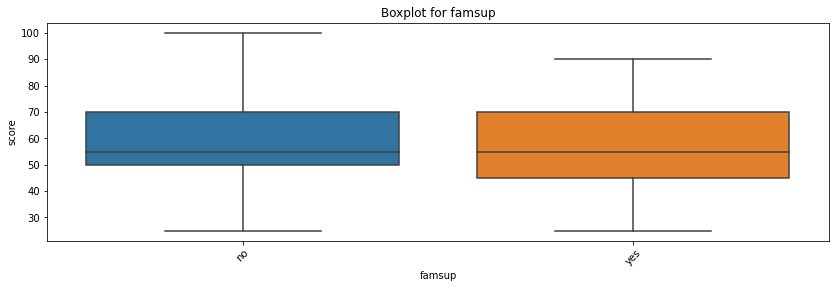

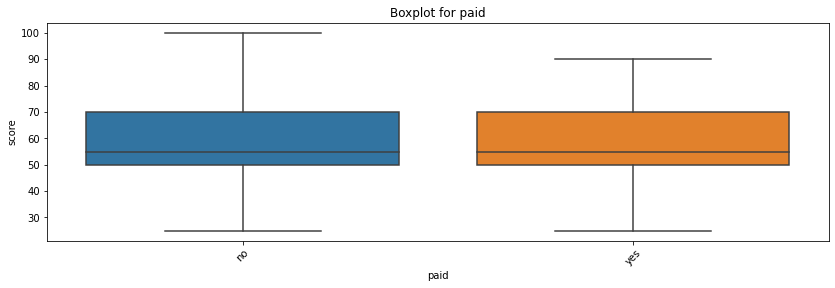

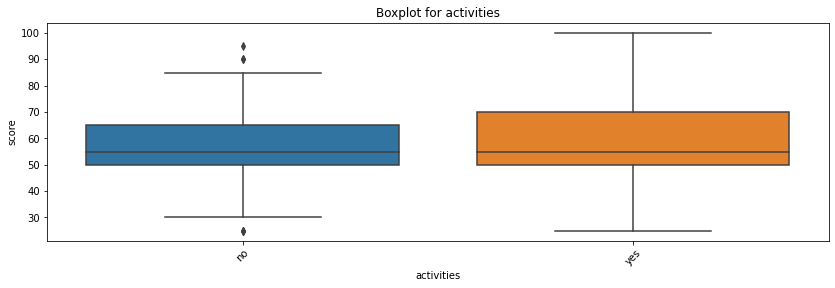

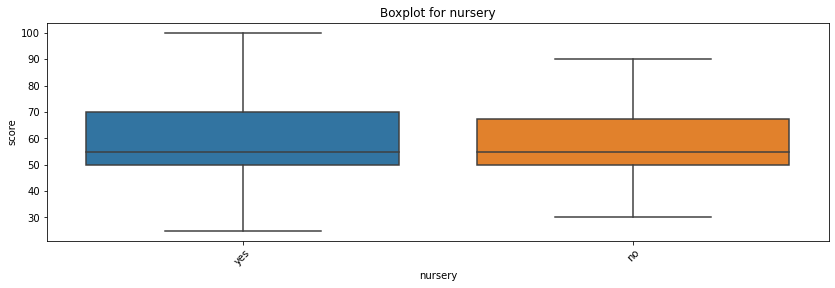

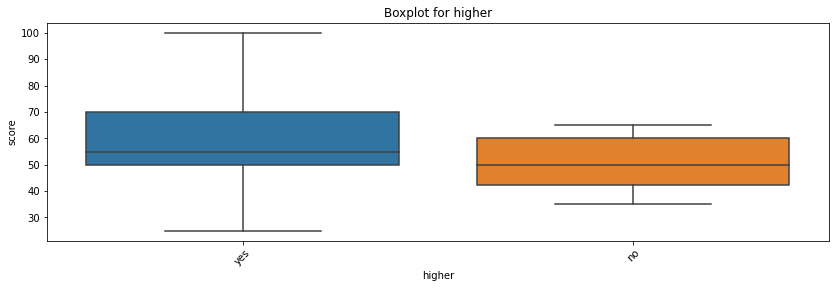

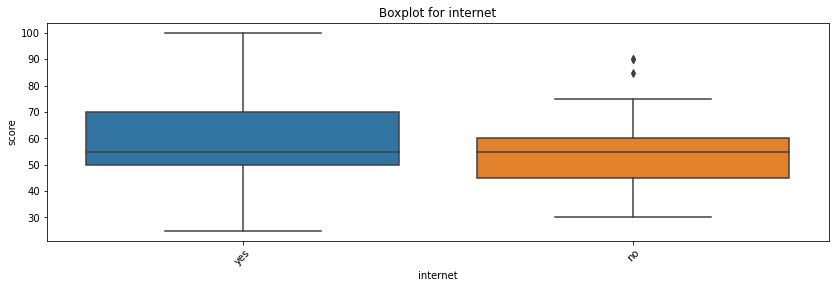

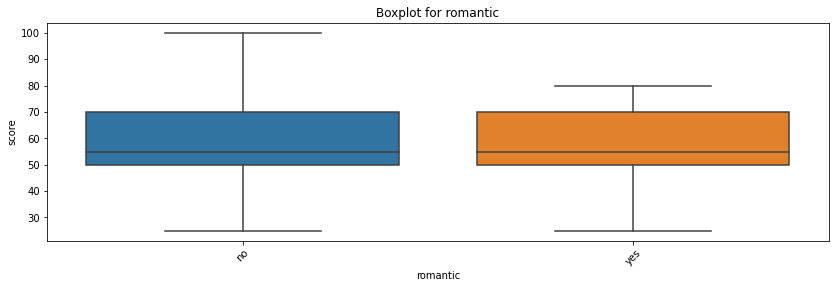

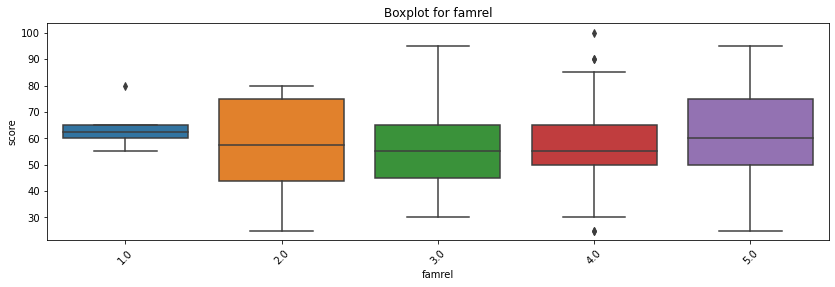

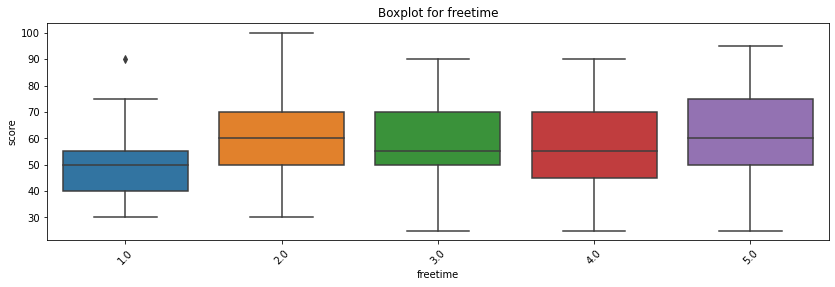

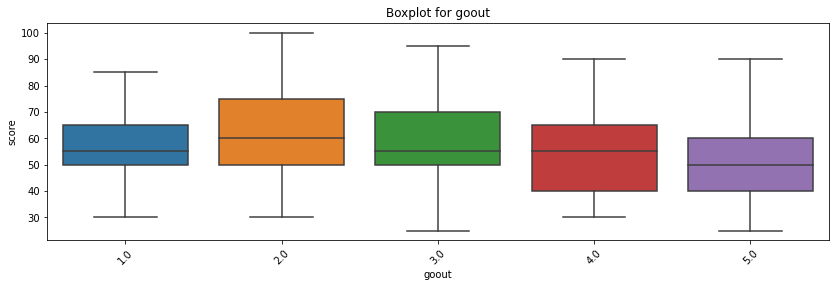

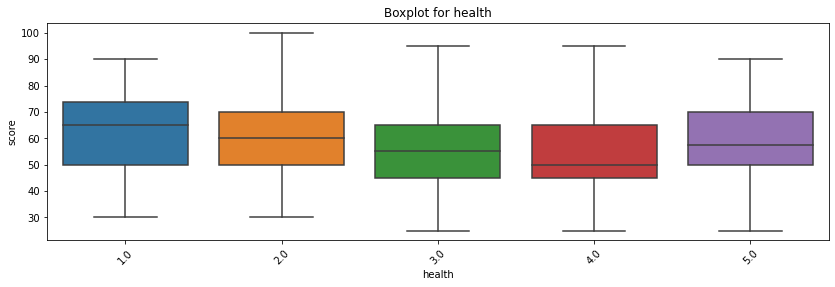

In [486]:
for col in ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
            'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
            'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'higher', 'internet', 'romantic', 'famrel', 'freetime',
            'goout', 'health']:
    get_boxplot(col)

Проверим, есть ли статистическая разница в распределении успеваемости по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения баллов по госэкзамену по различным параметрам неразличимы:

In [487]:
for col in ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
            'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
            'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'higher', 'internet', 'romantic', 'famrel', 'freetime',
            'goout', 'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки:  address
Найдены статистически значимые различия для колонки:  medu
Найдены статистически значимые различия для колонки:  mjob
Найдены статистически значимые различия для колонки:  studytime
Найдены статистически значимые различия для колонки:  failures
Найдены статистически значимые различия для колонки:  schoolsup


C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3583: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\user\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\user\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Итак, мы нашли несколько параметров, сильно влияющих на итоговые оценки на экзамене. Составим с ними новый датасет

In [511]:
stud_for_model = stud.loc[:, ['age', 'address', 'medu', 'fedu', 'mjob','absences',
                                'failures', 'schoolsup', 'studytime', 'goout', 'score' ]]
stud_for_model.sort_values('score', ascending=False)

,age,address,medu,fedu,mjob,absences,failures,schoolsup,studytime,goout,score
47,16,U,4.0,3.0,health,4.0,0.0,no,4.0,2.0,100.0
113,15,U,4.0,2.0,teacher,10.0,0.0,no,1.0,2.0,95.0
110,15,U,4.0,4.0,teacher,6.0,0.0,no,1.0,3.0,95.0
107,16,U,3.0,3.0,services,2.0,NaN,no,3.0,3.0,90.0
36,15,U,4.0,3.0,teacher,2.0,0.0,no,3.0,3.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...
248,18,R,3.0,3.0,other,8.0,1.0,no,2.0,3.0,25.0
79,16,U,3.0,4.0,at_home,12.0,0.0,NaN,2.0,3.0,25.0
384,18,R,4.0,2.0,other,14.0,1.0,no,1.0,3.0,25.0
18,17,U,3.0,2.0,services,16.0,3.0,no,1.0,5.0,25.0


# Настало время подвести выводы.


  В результате анализа влияния параметров обучения и жизни студентов на их итоговый балл по экзамену были получены следующие выводы:
  
 - В данных достаточно мало пустых значений.
 - Выбросы найдены в семи столбцах из тридцати: traveltime, schoolsup, internet, famrel, freetime, health и absences.
 - В столбцах famrel и fedu присутствали отличающиеся от изначально указанного диапазона данные.
 - Есть много (почти 10% от общего числа) нулевых значений в главном параметре score - были исключены по причинам, описанным выше
 - Отрицательная корреляция параметров failures, absences, goout и score говорят о том, что чем меньше внеучебных неудач у студента, чем меньше он пропускает занятия и проводит времени с друзьями (видимо, в ущерб времени, потраченным на учёбу), тем выше его итоговый балл.
 - Положительная корреляция между образованием родителей (medu,fedu), количеством времени, затраченном на обучение (studytime) и итоговой оценкой очевидна.
 
Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это 'age', 'address', 'medu', 'fedu', 'mjob','absences',n'failures', 'schoolsup', 'studytime', 'goout'.
 